In [1]:
import numpy as np
from mayavi import mlab
import matplotlib.cm as cm

# Define the coordinates of the trapezoid vertices
points = np.array([[2, 1, 5], [3, 1, 6], [3, 1, 0], [2, 1, 0]])

# Extract x, y, and z coordinates
x = points[:, 0]
y = points[:, 1]
z = points[:, 2]

# Define the indices of the trapezoid vertices to form triangles
triangles = [(0, 1, 2), (0, 2, 3)]

# Create a triangular mesh using the triangular_mesh function
mlab.triangular_mesh(x, y, z, triangles, color=(0.8, 0.8, 0.8))

# Show the plot
mlab.show()


In [9]:
import matplotlib.cm as cm

planes1 = zigzag_faces(num_planes=3, z_step=1, amplitude=1, anchor_pos=(1,0), along_axis='x')
planes1[:,:,2] += 5

planes2 = np.copy(planes1)
planes2[:,:,2] = 0

all = np.concatenate((planes1, planes2), axis=1)
all.shape

(3, 8, 3)

In [6]:
faces = []
for points in all:
    faces.append([points[0], points[1], points[5], points[4]])
faces = np.array(faces)
faces.shape

(3, 4, 3)

In [11]:
colors = [cm.viridis(x)[:3] for x in np.linspace(0, 1, len(faces))]

for face, c in zip(faces, colors):
    # Extract x, y, and z coordinates
    x = face[:, 0]
    y = face[:, 1]
    z = face[:, 2]
    # Define the indices of the trapezoid vertices to form triangles
    triangles = [(0, 1, 2), (0, 2, 3)]

    # Create a triangular mesh using the triangular_mesh function
    mlab.triangular_mesh(x, y, z, triangles, color=c)
mlab.show()

In [ ]:
points = np.array([[2, 1, 5], [3, 1, 6], [3, 1, 0], [2, 1, 0]])

# Extract x, y, and z coordinates
x = points[:, 0]
y = points[:, 1]
z = points[:, 2]

# Define the indices of the trapezoid vertices to form triangles
triangles = [(0, 1, 2), (0, 2, 3)]

# Create a triangular mesh using the triangular_mesh function
mlab.triangular_mesh(x, y, z, triangles, color=(0.8, 0.8, 0.8))

In [2]:
import numpy as np
from mayavi import mlab

# Define the coordinates of the trapezoid vertices
x = np.array([1, 2, 4, 5])
y = np.array([0, 3, 3, 0])

# Create a grid of coordinates
X, Y = np.meshgrid(x, y)

# Set the z-coordinates to create a flat trapezoid in 2D
Z = np.zeros_like(X)

# Create a mesh plot using the mesh function
mesh = mlab.mesh(X, Y, Z, color=(0.8, 0.8, 0.8))

# Show the plot
mlab.show()


In [14]:
import numpy as np
from mayavi import mlab
# mlab.init_notebook('x3d')
# mlab.options.offscreen = True
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def draw_surface(x, y, z, color):
    if type(z) == int: 
        x_ = np.linspace(x[0], x[1], 10)
        y_ = np.linspace(y[0], y[1], 10) 
        xx, yy = np.meshgrid(x_, y_)
        zz = np.ones((xx.shape[0], xx.shape[1]))*z
    if type(x) == int: 
        y_ = np.linspace(y[0], y[1], 10)    
        z_ = np.linspace(z[0], z[1], 10)    
        yy, zz = np.meshgrid(y_, z_)
        xx = np.ones((yy.shape[0], yy.shape[1]))*x
    if type(y) == int: 
        x_ = np.linspace(x[0], x[1], 10)    
        z_ = np.linspace(z[0], z[1], 10)    
        xx, zz = np.meshgrid(x_, z_)
        yy = np.ones((zz.shape[0], zz.shape[1]))*y
    mlab.mesh(xx, yy, zz, color=color)
     
def draw_box(xrange, yrange, zrange, color):
    draw_surface((xrange[0], xrange[1]), (yrange[0], yrange[1]), zrange[0], color)
    draw_surface((xrange[0], xrange[1]), (yrange[0], yrange[1]), zrange[1], color)
    draw_surface((xrange[0], xrange[1]), yrange[0], (zrange[0], zrange[1]), color)
    draw_surface((xrange[0], xrange[1]), yrange[1], (zrange[0], zrange[1]), color)
    draw_surface(xrange[0], (yrange[0], yrange[1]), (zrange[0], zrange[1]), color)
    draw_surface(xrange[1], (yrange[0], yrange[1]), (zrange[0], zrange[1]), color)
    
def sphere_to_surface(xrange, yrange, z, n, size, layers=1):
    x1 = np.random.randint(xrange[0]+size, xrange[1]-size//2, size=n)
    y1 = np.random.randint(yrange[0]+size, yrange[1]-size//2, size=n)
    z1 = np.ones(y1.shape)*z
    mlab.points3d(x1, y1, z1, scale_factor=size)
    
    if layers == 2:
        x2 = np.random.randint(xrange[0]+size, xrange[1]-size//2, size=n)
        y2 = np.random.randint(yrange[0]+size, yrange[1]-size//2, size=n)
        x2_new, y2_new = [], []
        for i in range(len(x2)):
            for j in range(len(x1)):
                if x2[i]==x1[j] and y2[i]==y1[j]:
                    x2_new.append(x2[i])
                    y2_new.append(y2[i])
    #     print(x2_new)
        if len(x2_new) > 1:
            x2_new = np.array(x2_new)
            y2_new = np.array(y2_new)
            z2 = np.ones(y2_new.shape)*(z+1)
            mlab.points3d(x2_new, y2_new, z2, scale_factor=size)
            
def zigzag_faces(num_planes=5, z_step=1, amplitude=1, anchor_pos=(1,0), along_axis='x', viz=False):
    '''
    define the points on planes following the order of front to back, left to right in the normal xyz space.
    '''
    if along_axis == 'x':
        points_front = np.array([(i, anchor_pos[0], 0) if i % (2 * z_step) == 0 else (i, anchor_pos[0], 1) for i in range(0, (num_planes+1) * z_step, z_step)])
        points_back = np.array([(i, anchor_pos[1], 0) if i % (2 * z_step) == 0 else (i, anchor_pos[1], 1) for i in range(0, (num_planes+1) * z_step, z_step)])

    elif along_axis == 'y':
        points_front = np.array([(anchor_pos[0], i, 0) if i % (2 * z_step) == 0 else (anchor_pos[0], i, 1) for i in range(0, (num_planes+1) * z_step, z_step)])
        points_back = np.array([(anchor_pos[1], i, 0) if i % (2 * z_step) == 0 else (anchor_pos[1], i, 1) for i in range(0, (num_planes+1) * z_step, z_step)])

    planes = []
    for i in range(points_back.shape[0]-1):
        planes.append([points_front[i], points_front[i+1], points_back[i+1], points_back[i]])
    planes = np.array(planes)
    return planes

def draw_tilt_z_plane(points, color):
    v1 = points[1] - points[0]
    v2 = points[2] - points[1]
    vector = np.cross(v1, v2).astype(np.float32)
    A, B, C = vector
    D = -np.dot(vector, points[0])

    x_min, x_max, y_min, y_max = np.min(points[:,0]), np.max(points[:,0]), np.min(points[:,1]), np.max(points[:,1])
    x = np.linspace(x_min, x_max, 10)
    y = np.linspace(y_min, y_max, 10)
    X, Y = np.meshgrid(x, y)
    Z = (-A * X - B * Y - D) / C
    mlab.mesh(X, Y, Z, color=color)

def draw_flat(points, color):
    '''
    four points should be on the same plane one of x, y, or z axis. 
    '''
    x_min, x_max, y_min, y_max, z_min, z_max = np.min(points[:,0]), np.max(points[:,0]), np.min(points[:,1]), np.max(points[:,1]), np.min(points[:,2]), np.max(points[:,2])

    
    if np.sum((points[0]-points[1])**2) != np.sum((points[2]-points[3])**2): # unparallel lines
        x = points[:, 0]
        y = points[:, 1]
        z = points[:, 2]
        triangles = [(0, 1, 2), (0, 2, 3)]

        # Create a triangular mesh using the triangular_mesh function
        mlab.triangular_mesh(x, y, z, triangles, color=c)

    else:
        if z_min == z_max: # z axis
            x = np.linspace(x_min, x_max, 10)
            y = np.linspace(y_min, y_max, 10)
            X, Y = np.meshgrid(x, y)
            Z = np.ones(X.shape)*z_min
        
        elif y_min == y_max: # y axis
            x = np.linspace(x_min, x_max, 10)
            z = np.linspace(z_min, z_max, 10)
            X, Z = np.meshgrid(x, z)
            Y = np.ones(X.shape)*y_min
        
        elif x_min == x_max: # x axis
            y = np.linspace(y_min, y_max, 10)
            z = np.linspace(z_min, z_max, 10)
            Y, Z = np.meshgrid(y, z)
            X = np.ones(Y.shape)*x_min

        mlab.mesh(X, Y, Z, color=color)

def viz_matplotlib(planes):
    colors = [cm.viridis(x)[:3] for x in np.linspace(0, 1, len(planes))]

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    for p, c in zip(planes, colors):
        ax.plot(p[:,0], p[:,1], p[:,2], color=c)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=30, azim=45)
    plt.show()

def viz_mlab(planes):
    colors = [cm.viridis(x)[:3] for x in np.linspace(0, 1, len(planes))]
    for p, c in zip(planes, colors):
        draw_tilt_z_plane(p, color=c)

In [15]:
def draw_box(points, color=(0,0,0)):
    faces = np.array([ 
        [points[0], points[1], points[2], points[3]],
        [points[4], points[5], points[6], points[7]],
        [points[0], points[1], points[5], points[4]],
        [points[2], points[3], points[7], points[6]],
        [points[1], points[2], points[6], points[5]],
        [points[4], points[7], points[3], points[0]]
    ])
    print(faces.shape)
    for f in faces:
        if f[:,0].max() == f[:,0].min() or f[:,1].max() == f[:,1].min() or f[:,2].max() == f[:,2].min():
            draw_flat(f, color=color)
        else:
            draw_tilt_z_plane(f, color=color)

planes1 = zigzag_faces(num_planes=3, z_step=1, amplitude=1, anchor_pos=(1,0), along_axis='x')
planes1[:,:,2] += 5

planes2 = np.copy(planes1)
planes2[:,:,2] = 0

all = np.concatenate((planes1, planes2), axis=1)
colors = [cm.viridis(x)[:3] for x in np.linspace(0, 1, len(all))]
for p, c in zip(all, colors):
    draw_box(p, color=c)
mlab.show()

(6, 4, 3)
(6, 4, 3)
(6, 4, 3)


In [7]:
p

array([[2, 1, 5],
       [3, 1, 6],
       [3, 0, 6],
       [2, 0, 5],
       [2, 1, 0],
       [3, 1, 0],
       [3, 0, 0],
       [2, 0, 0]])

In [ ]:
face = [[2, 1, 5], [3, 1, 6], [3, 1, 0], [2, 1, 0]]


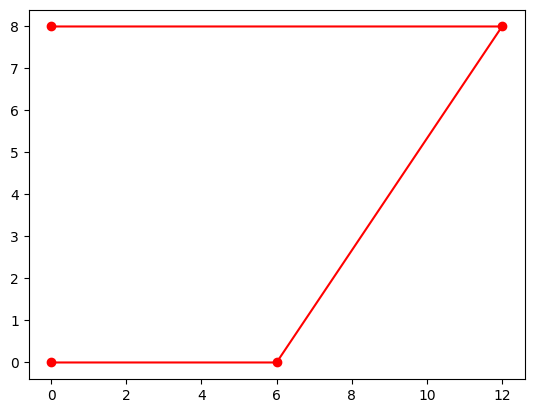

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Define trapezoid parameters
top_width = 6.0
bottom_width = 12.0
height = 8.0

# Generate coordinates for the trapezoid
x_coords = np.array([0, top_width, bottom_width, 0])
y_coords = np.array([0, 0, height, height])

x, y = np.meshgrid(np.linspace(0, bottom_width, 100), np.linspace(0, height, 100))

# Plot the trapezoid shape
plt.plot(x_coords, y_coords, 'ro-', label='Trapezoid')

plt.show()


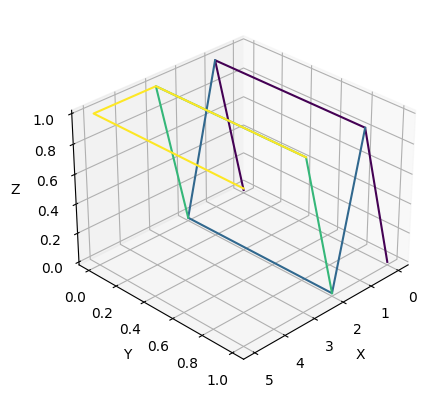

(4, 3)
(4, 3)
(4, 3)
(4, 3)


In [8]:
planes = zigzag_faces(num_planes=3, z_step=1, amplitude=1, anchor_pos=(1,0), along_axis='x')
planes = np.concatenate( (planes, np.array([[[3, 1, 1], [3, 0, 1], [5, 0, 1], [5, 1, 1]]])) )

colors = [cm.viridis(x)[:3] for x in np.linspace(0, 1, len(planes))]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for p, c in zip(planes, colors):
    ax.plot(p[:,0], p[:,1], p[:,2], color=c)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=30, azim=45)
plt.show()

mlab.figure(size=(800, 600))
for p, c in zip(planes, colors):
    draw_tilt(p, color=c)
mlab.show()

In [9]:
def viz_matplotlib(planes):
    colors = [cm.viridis(x)[:3] for x in np.linspace(0, 1, len(planes))]

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    for p, c in zip(planes, colors):
        ax.plot(p[:,0], p[:,1], p[:,2], color=c)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=30, azim=45)
    plt.show()

def viz_mlab(planes):
    colors = [cm.viridis(x)[:3] for x in np.linspace(0, 1, len(planes))]
    for p, c in zip(planes, colors):
        draw_tilt(p, color=c)

In [10]:
planes1 = zigzag_faces(num_planes=3, z_step=1, amplitude=1, anchor_pos=(1,0), along_axis='x')
planes1[:,:,2] += 5

planes2 = np.copy(planes1)
planes2[:,:,2] = 0

all = np.concatenate((planes1, planes2), axis=1)

mlab.figure(size=(800, 600))
viz_mlab(planes1)
viz_mlab(planes2)
mlab.show()

(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)
(4, 3)


In [21]:
def draw_tilt(points, color):
    v1 = points[1] - points[0]
    v2 = points[2] - points[1]
    vector = np.cross(v1, v2).astype(np.float32)
    A, B, C = vector
    D = -np.dot(vector, points[0])

    # print(points.shape)
    x_min, x_max, y_min, y_max = np.min(points[:,0]), np.max(points[:,0]), np.min(points[:,1]), np.max(points[:,1])
    x = np.linspace(x_min, x_max, 50)  # Adjust the range and number of points as needed
    y = np.linspace(y_min, y_max, 50)  # Adjust the range and number of points as needed
    X, Y = np.meshgrid(x, y)

    Z = (-A * X - B * Y - D) / C
    mlab.mesh(X, Y, Z, color=color)
    
def draw_box(points, color=(0,0,0)):
    faces = np.array([ 
        [points[0], points[1], points[2], points[3]],
        [points[4], points[5], points[6], points[7]],
        [points[0], points[1], points[5], points[4]],
        [points[2], points[3], points[7], points[6]],
        [points[1], points[2], points[6], points[5]],
        [points[4], points[7], points[3], points[0]]
    ])
    print(faces.shape)
    for f in faces:
        draw_tilt(f, color=color)

colors = [cm.viridis(x)[:3] for x in np.linspace(0, 1, len(all))]
for p, c in zip(all, colors):
    draw_box(p, color=c)

c:\Users\yig319\Anaconda3\envs\afm\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
c:\Users\yig319\Anaconda3\envs\afm\lib\site-packages\mayavi\core\utils.py:86: RuntimeWarning: All-NaN axis encountered
  res = [float(np.nanmin(x)), float(np.nanmax(x))]
Exception occurred in traits notification handler for object: <mayavi.core.lut_manager.LUTManager object at 0x0000022067CCB048>, trait: data_range, old value: [0. 1.], new value: [nan nan]
Traceback (most recent call last):
  File "c:\Users\yig319\Anaconda3\envs\afm\lib\site-packages\traits\trait_notifiers.py", line 342, in __call__
    self.handler(*args)
  File "c:\Users\yig319\Anaconda3\envs\afm\lib\site-packages\mayavi\core\lut_manager.py", line 434, in _data_range_changed
    assert value[0] <= value[1]
AssertionError
Exception occurred in traits notification handler for object: <mayavi.core.lut_manager.LUTManager object at 0x000002206B405108>, trait: data_range, old value: [0.

(6, 4, 3)


Exception occurred in traits notification handler for object: <mayavi.core.lut_manager.LUTManager object at 0x000002206B3ADBE8>, trait: data_range, old value: [0. 1.], new value: [nan nan]
Traceback (most recent call last):
  File "c:\Users\yig319\Anaconda3\envs\afm\lib\site-packages\traits\trait_notifiers.py", line 342, in __call__
    self.handler(*args)
  File "c:\Users\yig319\Anaconda3\envs\afm\lib\site-packages\mayavi\core\lut_manager.py", line 434, in _data_range_changed
    assert value[0] <= value[1]
AssertionError
Exception occurred in traits notification handler for object: <mayavi.core.lut_manager.LUTManager object at 0x000002206B43C288>, trait: data_range, old value: [0. 1.], new value: [nan nan]
Traceback (most recent call last):
  File "c:\Users\yig319\Anaconda3\envs\afm\lib\site-packages\traits\trait_notifiers.py", line 342, in __call__
    self.handler(*args)
  File "c:\Users\yig319\Anaconda3\envs\afm\lib\site-packages\mayavi\core\lut_manager.py", line 434, in _data_ran

(6, 4, 3)
(6, 4, 3)


Exception occurred in traits notification handler for object: <mayavi.core.lut_manager.LUTManager object at 0x0000022066C0D048>, trait: data_range, old value: [0. 1.], new value: [nan nan]
Traceback (most recent call last):
  File "c:\Users\yig319\Anaconda3\envs\afm\lib\site-packages\traits\trait_notifiers.py", line 342, in __call__
    self.handler(*args)
  File "c:\Users\yig319\Anaconda3\envs\afm\lib\site-packages\mayavi\core\lut_manager.py", line 434, in _data_range_changed
    assert value[0] <= value[1]
AssertionError
Exception occurred in traits notification handler for object: <mayavi.core.lut_manager.LUTManager object at 0x0000022066C57288>, trait: data_range, old value: [0. 1.], new value: [nan nan]
Traceback (most recent call last):
  File "c:\Users\yig319\Anaconda3\envs\afm\lib\site-packages\traits\trait_notifiers.py", line 342, in __call__
    self.handler(*args)
  File "c:\Users\yig319\Anaconda3\envs\afm\lib\site-packages\mayavi\core\lut_manager.py", line 434, in _data_ran

In [14]:
points.shape

(3, 8, 3)

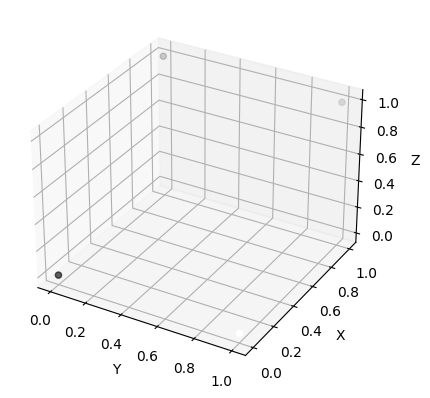

In [4]:
p1 = planes[0]
colors = [cm.Greys(x)[:3] for x in np.linspace(0, 1, len(p1))]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(p1[:,1], p1[:,0], p1[:,2], color=colors)
ax.set_xlabel('Y')
ax.set_ylabel('X')
ax.set_zlabel('Z')
plt.show()

In [7]:
def draw_tilt(points, color):
    # v1 = points[1] - points[0]
    # v2 = points[2] - points[1]
    # normal = np.cross(v1, v2).astype(np.float32)
    # print(np.linalg.norm(normal), normal)
    # normal /= np.linalg.norm(normal)
    # print(v1, v2, normal)

    normal = v1
    A, B, C = normal
    D = -np.dot(normal, points[0])

    x = np.linspace(0, 1, 50)  # Adjust the range and number of points as needed
    y = np.linspace(0, 1, 50)  # Adjust the range and number of points as needed
    X, Y = np.meshgrid(x, y)

    Z = (-A * X - B * Y - D) / C
    # Z = np.zeros_like(X)
    mlab.mesh(X, Y, Z, color=color)

# Create the mesh for the tilted face
mlab.figure(size=(800, 600))
draw_tilt(p1, color=(0,0,1))
mlab.show()

1.4142135 [ 1.  0. -1.]
[1 0 1] [ 0 -1  0] [ 0.70710677  0.         -0.70710677]


In [ ]:
def draw_tilt(points, color):
        
    # Calculate the normal vector to the plane using the first two points
    v1 = points[1] - points[0]
    v2 = points[2] - points[1]
    normal = np.cross(v1, v2)

    print(v1, v2, normal)

    # Calculate the plane equation parameters (A, B, C, D) ax + by + cz + d = 0
    A, B, C = normal
    D = -np.dot(normal, points[0])

    # Create a grid of points
    x = np.linspace(0, 1, 50)  # Adjust the range and number of points as needed
    y = np.linspace(0, 1, 50)  # Adjust the range and number of points as needed
    X, Y = np.meshgrid(x, y)

    # Calculate Z based on the plane equation
    Z = (-A * X - B * Y - D) / C
    mlab.mesh(X, Y, Z, color=color)

colors = [cm.viridis(x)[:3] for x in np.linspace(0, 1, len(planes))]
# Create the mesh for the tilted face
mlab.figure(size=(800, 600))
draw_tilt(p, color=c)
mlab.show()

In [58]:
planes

array([[[0, 1, 0],
        [1, 1, 1],
        [1, 0, 1],
        [0, 0, 0]],

       [[1, 1, 1],
        [2, 1, 0],
        [2, 0, 0],
        [1, 0, 1]],

       [[2, 1, 0],
        [3, 1, 1],
        [3, 0, 1],
        [2, 0, 0]],

       [[3, 1, 1],
        [4, 1, 0],
        [4, 0, 0],
        [3, 0, 1]],

       [[4, 1, 0],
        [5, 1, 1],
        [5, 0, 1],
        [4, 0, 0]]])

In [51]:
def draw_tilt(points, color):
        
    # Calculate the normal vector to the plane using the first two points
    v1 = points[1] - points[0]
    v2 = points[2] - points[1]
    normal = np.cross(v1, v2)

    print(v1, v2, normal)

    # Calculate the plane equation parameters (A, B, C, D) ax + by + cz + d = 0
    A, B, C = normal
    D = -np.dot(normal, points[0])

    # Create a grid of points
    x = np.linspace(0, 1, 50)  # Adjust the range and number of points as needed
    y = np.linspace(0, 1, 50)  # Adjust the range and number of points as needed
    X, Y = np.meshgrid(x, y)

    # Calculate Z based on the plane equation
    Z = (-A * X - B * Y - D) / C
    mlab.mesh(X, Y, Z, color=color)

colors = [cm.viridis(x)[:3] for x in np.linspace(0, 1, len(planes))]
# Create the mesh for the tilted face
mlab.figure(size=(800, 600))
for p, c in zip(planes, colors):
    draw_tilt(p, color=c)
mlab.show()

[1 0 1] [ 0 -1  0] [ 1  0 -1]
[ 1  0 -1] [ 0 -1  0] [-1  0 -1]
[1 0 1] [ 0 -1  0] [ 1  0 -1]
[ 1  0 -1] [ 0 -1  0] [-1  0 -1]
[1 0 1] [ 0 -1  0] [ 1  0 -1]


In [10]:
planes[0]

array([[0, 1, 0],
       [1, 1, 1],
       [1, 0, 1],
       [0, 0, 0]])

In [18]:
len

<function len(obj, /)>

In [24]:
def meshgrid2(*arrs):
    arrs = tuple(reversed(arrs))  #edit
    lens = list(map(len, arrs))
    dim = len(arrs)

    print(lens)
    sz = 1
    for s in lens:
        sz*=s

    ans = []    
    for i, arr in enumerate(arrs):
        slc = [1]*dim
        slc[i] = lens[i]
        arr2 = np.array(arr).reshape(slc)
        for j, sz in enumerate(lens):
            if j!=i:
                arr2 = arr2.repeat(sz, axis=j) 
        ans.append(arr2)

    return tuple(ans)

x = points[:, 0]
y = points[:, 1]
z = points[:, 2]
X, Y, Z = meshgrid2(x, y, z)
print(X.shape, Y.shape, Z.shape)


[4, 4, 4]
(4, 4, 4) (4, 4, 4) (4, 4, 4)


In [25]:
from mayavi import mlab
import numpy as np

# Define the four points
points = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [1, 0, 1],
    [0, 0, 0]
])

# Create a 2D grid from the x and y coordinates of the points
x = points[:, 0]
y = points[:, 1]
X, Y = np.meshgrid(x, y)

# Calculate the z-coordinates based on the equation of a tilted plane
# For example, z = 0.5 * x + 0.7 * y
Z = 0.5 * X + 0.7 * Y  # Adjust the coefficients as needed to tilt the face

# Create the mesh for the tilted face
mlab.figure(size=(800, 600))
mlab.mesh(X, Y, Z, color=(1, 0, 0))

mlab.view(azimuth=45, elevation=45)
mlab.show()


In [27]:
X, Y

(array([[0, 1, 1, 0],
        [0, 1, 1, 0],
        [0, 1, 1, 0],
        [0, 1, 1, 0]]),
 array([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]))

In [26]:
Z

array([[0.7, 1.2, 1.2, 0.7],
       [0.7, 1.2, 1.2, 0.7],
       [0. , 0.5, 0.5, 0. ],
       [0. , 0.5, 0.5, 0. ]])

In [22]:
mlab.mesh(X, Y, Z, color=(1, 0, 0))
mlab.show()

AssertionError: Array x must be 2 dimensional.

In [ ]:
draw_surface(x=(2,5), y=(2,5), z=1, color=(44/255,162/255,95/255))
mlab.show()    

In [6]:
import numpy
from mayavi.mlab import *

def test_mesh():
    """A very pretty picture of spherical harmonics translated from
    the octaviz example."""
    pi = np.pi
    cos = np.cos
    sin = np.sin
    dphi, dtheta = pi / 250.0, pi / 250.0
    [phi, theta] = np.mgrid[0:pi + dphi * 1.5:dphi,
                            0:2 * pi + dtheta * 1.5:dtheta]
    m0 = 4
    m1 = 3
    m2 = 2
    m3 = 3
    m4 = 6
    m5 = 2
    m6 = 6
    m7 = 4
    r = sin(m0 * phi) ** m1 + cos(m2 * phi) ** m3 + \
        sin(m4 * theta) ** m5 + cos(m6 * theta) ** m7
    x = r * sin(phi) * cos(theta)
    y = r * cos(phi)
    z = r * sin(phi) * sin(theta)

    return mesh(x, y, z, colormap="bone")
test_mesh()

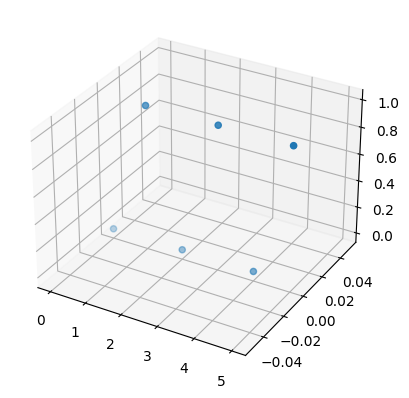

In [15]:
num_planes = 5
z_step = 1
points = [(i, 0, 0) if i % (2 * z_step) == 0 else (i, 0, 1) for i in range(0, (num_planes+1) * z_step, z_step)]
points = np.array(points)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2], marker='o')

In [11]:
num_points = 8
z_step = 1

points = [(i, 0, 0) if i % (2 * z_step) == 0 else (i, 0, 1) for i in range(0, num_points * z_step, z_step)]
points = np.array(points)

print(points)

[[0 0 0]
 [1 0 1]
 [2 0 0]
 [3 0 1]
 [4 0 0]
 [5 0 1]
 [6 0 0]
 [7 0 1]]


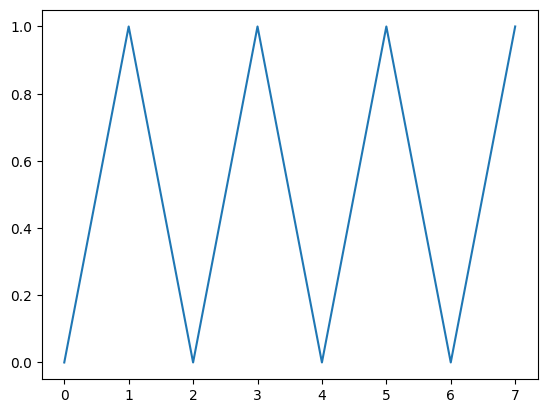

In [12]:
points = np.array(points)

plt.plot(points[:,2])

In [1]:
from mayavi import mlab

# Define the dimensions of the rectangle
length_x = 1
length_y = 15
length_z = 1

# Create a 3D rectangle using plot3d
mlab.figure(size=(800, 600))
mlab.plot3d([0, length_x, length_x, 0, 0, 0, length_x, length_x, 0, 0, 0, length_x],
            [0, 0, 0, 0, 0, length_y, length_y, length_y, length_y, length_y, 0, 0],
            [0, 0, length_z, length_z, 0, 0, 0, length_z, length_z, 0, 0, 0],
            color=(1, 0, 0), tube_radius=0.05)

mlab.view(azimuth=45, elevation=45)
mlab.show()

In [23]:
import numpy as np
from mayavi import mlab

# Define the coordinates of the vertices
vertices = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 5, 0],  # Adjust the y-coordinate to set the desired length
    [0.8, 5.2, 0],  # Adjust the y-coordinate
    [0.2, 5.2, 0],  # Adjust the y-coordinate
    [0, 5, 0],  # Adjust the y-coordinate
    [0, 0, 1],
    [1, 0, 1],
    [1, 5, 1],  # Adjust the y-coordinate
    [0.8, 5.2, 1],  # Adjust the y-coordinate
    [0.2, 5.2, 1],  # Adjust the y-coordinate
    [0, 5, 1]  # Adjust the y-coordinate
])

# Define the edges that connect the vertices to create the rectangular shape
edges = [
    (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0),
    (0, 6), (1, 7), (2, 8), (3, 9), (4, 10), (5, 11),
    (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 6)
]

# Create a figure
fig = mlab.figure()

# Plot the edges
for edge in edges:
    mlab.plot3d(
        vertices[edge, 0],
        vertices[edge, 1],
        vertices[edge, 2],
        tube_radius=0.02, color=(1, 0, 0)  # You can adjust tube_radius and color
    )

# Show the plot
mlab.show()


In [ ]:
import numpy as np

# Define the number of points and the zigzag pattern parameters
num_points = 50
amplitude = 1.0
frequency = 2.0

# Create a list of points in 3D space
z_values = np.linspace(0, 10, num_points)
x_values = amplitude * np.sin(frequency * z_values)
y_values = amplitude * np.cos(frequency * z_values)

# Combine x, y, and z values to form a list of 3D points
points = list(zip(x_values, y_values, z_values))

print(points)

In [4]:
import numpy as np
from mayavi import mlab

def draw_3d_rec(vertices, color=(0,0,0), tube_radius=0.02):
    
    '''
    points = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0], [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]]) for square
    '''
    edges = [
        (0, 1), (1, 2), (2, 3), (3, 0),
        (4, 5), (5, 6), (6, 7), (7, 4),
        (0, 4), (1, 5), (2, 6), (3, 7)
    ]

    fig = mlab.figure(size = (1024,768), bgcolor = (1,1,1), fgcolor = (146/255,197/255,222/255))
    for edge in edges:
        mlab.plot3d(
            vertices[edge, 0],
            vertices[edge, 1],
            vertices[edge, 2],
            tube_radius=tube_radius, color=color  # You can adjust tube_radius and color
        )
    mlab.show() 

In [19]:
v = np.array([[0, 0, 0], [1, 0, 0], [1, 5, 0], [0, 5, 0], [0, 0, 5], [1, 0, 5], [1, 5, 5], [0, 5, 5]])
draw_3d_rec(v, color=(44/255,162/255,95/255), tube_radius=0.02)

In [21]:
vertices[edge, 1]

array([1., 1.])

In [22]:
edge

[(0, 1),
 (1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 0),
 (0, 6),
 (1, 7),
 (2, 8),
 (3, 9),
 (4, 10),
 (5, 11),
 (6, 7),
 (7, 8),
 (8, 9),
 (9, 10),
 (10, 11),
 (11, 6)]

In [3]:
import numpy as np
from mayavi import mlab

# Define the coordinates of the vertices
vertices = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
])

# Define the edges that connect the vertices to form the rectangle
edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),
    (4, 5), (5, 6), (6, 7), (7, 4),
    (0, 4), (1, 5), (2, 6), (3, 7)
]

# Create a figure
fig = mlab.figure()

# Plot the edges
for edge in edges:
    mlab.plot3d(
        vertices[edge, 0],
        vertices[edge, 1],
        vertices[edge, 2],
        tube_radius=0.02, color=(1, 0, 0)  # You can adjust tube_radius and color
    )

# Show the plot
mlab.show()

In [6]:
import numpy as np
from mayavi import mlab
# mlab.init_notebook('x3d')
# mlab.options.offscreen = True
import matplotlib.pyplot as plt

def draw_surface(x, y, z, color):
    if type(z) == int: 
        x_ = np.linspace(x[0], x[1], 10)
        y_ = np.linspace(y[0], y[1], 10) 
        xx, yy = np.meshgrid(x_, y_)
        zz = np.ones((xx.shape[0], xx.shape[1]))*z
    if type(x) == int: 
        y_ = np.linspace(y[0], y[1], 10)    
        z_ = np.linspace(z[0], z[1], 10)    
        yy, zz = np.meshgrid(y_, z_)
        xx = np.ones((yy.shape[0], yy.shape[1]))*x
    if type(y) == int: 
        x_ = np.linspace(x[0], x[1], 10)    
        z_ = np.linspace(z[0], z[1], 10)    
        xx, zz = np.meshgrid(x_, z_)
        yy = np.ones((zz.shape[0], zz.shape[1]))*y
    mlab.mesh(xx, yy, zz, color=color)
     
def draw_box(xrange, yrange, zrange, color):
    draw_surface((xrange[0], xrange[1]), (yrange[0], yrange[1]), zrange[0], color)
    draw_surface((xrange[0], xrange[1]), (yrange[0], yrange[1]), zrange[1], color)
    draw_surface((xrange[0], xrange[1]), yrange[0], (zrange[0], zrange[1]), color)
    draw_surface((xrange[0], xrange[1]), yrange[1], (zrange[0], zrange[1]), color)
    draw_surface(xrange[0], (yrange[0], yrange[1]), (zrange[0], zrange[1]), color)
    draw_surface(xrange[1], (yrange[0], yrange[1]), (zrange[0], zrange[1]), color)
    
def sphere_to_surface(xrange, yrange, z, n, size, layers=1):
    x1 = np.random.randint(xrange[0]+size, xrange[1]-size//2, size=n)
    y1 = np.random.randint(yrange[0]+size, yrange[1]-size//2, size=n)
    z1 = np.ones(y1.shape)*z
    mlab.points3d(x1, y1, z1, scale_factor=size)
    
    if layers == 2:
        x2 = np.random.randint(xrange[0]+size, xrange[1]-size//2, size=n)
        y2 = np.random.randint(yrange[0]+size, yrange[1]-size//2, size=n)
        x2_new, y2_new = [], []
        for i in range(len(x2)):
            for j in range(len(x1)):
                if x2[i]==x1[j] and y2[i]==y1[j]:
                    x2_new.append(x2[i])
                    y2_new.append(y2[i])
    #     print(x2_new)
        if len(x2_new) > 1:
            x2_new = np.array(x2_new)
            y2_new = np.array(y2_new)
            z2 = np.ones(y2_new.shape)*(z+1)
            mlab.points3d(x2_new, y2_new, z2, scale_factor=size)import numpy as np
from mayavi import mlab
# mlab.init_notebook('x3d')
# mlab.options.offscreen = True
import matplotlib.pyplot as plt

def draw_surface(x, y, z, color):
    if type(z) == int: 
        x_ = np.linspace(x[0], x[1], 10)
        y_ = np.linspace(y[0], y[1], 10) 
        xx, yy = np.meshgrid(x_, y_)
        zz = np.ones((xx.shape[0], xx.shape[1]))*z
    if type(x) == int: 
        y_ = np.linspace(y[0], y[1], 10)    
        z_ = np.linspace(z[0], z[1], 10)    
        yy, zz = np.meshgrid(y_, z_)
        xx = np.ones((yy.shape[0], yy.shape[1]))*x
    if type(y) == int: 
        x_ = np.linspace(x[0], x[1], 10)    
        z_ = np.linspace(z[0], z[1], 10)    
        xx, zz = np.meshgrid(x_, z_)
        yy = np.ones((zz.shape[0], zz.shape[1]))*y
    mlab.mesh(xx, yy, zz, color=color)
     
def draw_box(xrange, yrange, zrange, color):
    draw_surface((xrange[0], xrange[1]), (yrange[0], yrange[1]), zrange[0], color)
    draw_surface((xrange[0], xrange[1]), (yrange[0], yrange[1]), zrange[1], color)
    draw_surface((xrange[0], xrange[1]), yrange[0], (zrange[0], zrange[1]), color)
    draw_surface((xrange[0], xrange[1]), yrange[1], (zrange[0], zrange[1]), color)
    draw_surface(xrange[0], (yrange[0], yrange[1]), (zrange[0], zrange[1]), color)
    draw_surface(xrange[1], (yrange[0], yrange[1]), (zrange[0], zrange[1]), color)
    
def sphere_to_surface(xrange, yrange, z, n, size, layers=1):
    x1 = np.random.randint(xrange[0]+size, xrange[1]-size//2, size=n)
    y1 = np.random.randint(yrange[0]+size, yrange[1]-size//2, size=n)
    z1 = np.ones(y1.shape)*z
    mlab.points3d(x1, y1, z1, scale_factor=size)
    
    if layers == 2:
        x2 = np.random.randint(xrange[0]+size, xrange[1]-size//2, size=n)
        y2 = np.random.randint(yrange[0]+size, yrange[1]-size//2, size=n)
        x2_new, y2_new = [], []
        for i in range(len(x2)):
            for j in range(len(x1)):
                if x2[i]==x1[j] and y2[i]==y1[j]:
                    x2_new.append(x2[i])
                    y2_new.append(y2[i])
    #     print(x2_new)
        if len(x2_new) > 1:
            x2_new = np.array(x2_new)
            y2_new = np.array(y2_new)
            z2 = np.ones(y2_new.shape)*(z+1)
            mlab.points3d(x2_new, y2_new, z2, scale_factor=size)

In [13]:
size = 1
mlab.figure(size = (1024,768), bgcolor = (1,1,1), fgcolor = (146/255,197/255,222/255)) 

draw_box(xrange=(0, 30), yrange=(0, 30), zrange=(0, 2), color=(44/255,162/255,95/255))

mlab.show()    

In [5]:
n_list = [5, 30, 100, 300, 1000]
filename_list = ['3d_growth_model/stage_0.png', '3d_growth_model/stage_1.png', '3d_growth_model/stage_2.png', 
             '3d_growth_model/stage_3.png', '3d_growth_model/stage_4.png']
for n, filename in zip(n_list, filename_list):
    size = 1
    mlab.figure(size = (1024,768), bgcolor = (1,1,1), fgcolor = (146/255,197/255,222/255))
#     mlab.figure(size = (1024,768), fgcolor = (146/255,197/255,222/255))
    
    draw_box(xrange=(0, 10), yrange=(0, 30), zrange=(4, 6), color=(229/255,245/255,249/255))
    sphere_to_surface(xrange=(0, 10), yrange=(0, 30), z=6, n=n, size=size)

    draw_box(xrange=(0, 20), yrange=(0, 30), zrange=(2, 4), color=(153/255,216/255,201/255))
    sphere_to_surface(xrange=(10, 20), yrange=(0, 30), z=4, n=n, size=size)

    draw_box(xrange=(0, 30), yrange=(0, 30), zrange=(0, 2), color=(44/255,162/255,95/255))
    sphere_to_surface(xrange=(20, 30), yrange=(0, 30), z=2, n=n, size=size)

    # mlab.savefig(filename)
    mlab.show()    

In [10]:
n = 5
filename = '3d_growth_model/stage_0.png'

fig = mlab.figure(size = (1024,768), fgcolor = (146/255,197/255,222/255))

draw_box(xrange=(0, 10), yrange=(0, 30), zrange=(4, 6), color=(229/255,245/255,249/255))
sphere_to_surface(xrange=(0, 10), yrange=(0, 30), z=6, n=n, size=1)

f = mlab.gcf()
f.scene._lift()
arr = mlab.screenshot()

In [11]:
mlab.close(all=True)

In [12]:
arr.shape

(718, 1024, 3)

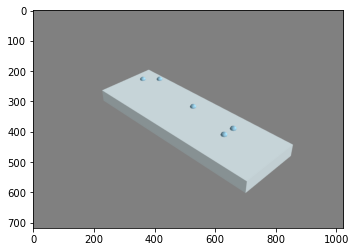

In [15]:
plt.imshow(arr)
plt.savefig('test.svg')
plt.show()

In [16]:
n_list = [5, 30, 100, 300, 1000]
filename_list = ['3d_growth_model/stage_0.png', '3d_growth_model/stage_1.png', '3d_growth_model/stage_2.png', 
             '3d_growth_model/stage_3.png', '3d_growth_model/stage_4.png']
for n, filename in zip(n_list, filename_list):
    size = 1
    mlab.figure(size = (1024,768), bgcolor = (1,1,1), fgcolor = (146/255,197/255,222/255))
#     mlab.figure(size = (1024,768), fgcolor = (146/255,197/255,222/255))
    
    draw_box(xrange=(0, 10), yrange=(0, 30), zrange=(4, 6), color=(229/255,245/255,249/255))
    sphere_to_surface(xrange=(0, 10), yrange=(0, 30), z=6, n=n, size=size)

    draw_box(xrange=(0, 20), yrange=(0, 30), zrange=(2, 4), color=(153/255,216/255,201/255))
    sphere_to_surface(xrange=(10, 20), yrange=(0, 30), z=4, n=n, size=size)

    draw_box(xrange=(0, 30), yrange=(0, 30), zrange=(0, 2), color=(44/255,162/255,95/255))
    sphere_to_surface(xrange=(20, 30), yrange=(0, 30), z=2, n=n, size=size)

    mlab.savefig(filename)
    mlab.show()    

In [20]:
mlab.close(all=True)

NameError: name 'mlab' is not defined

In [13]:
imgmap = mlab.screenshot(figure=fig, mode='rgba', antialiased=True)

AttributeError: 'NoneType' object has no attribute 'render_window'

In [2]:
    size = 1
    # mlab.figure(size = (1024,768), bgcolor = (1,1,1), fgcolor = (146/255,197/255,222/255))
    mlab.figure(size = (1024,768), fgcolor = (146/255,197/255,222/255))
    
    draw_box(xrange=(0, 10), yrange=(0, 30), zrange=(4, 6), color=(229/255,245/255,249/255))
    sphere_to_surface(xrange=(0, 10), yrange=(0, 30), z=6, n=n, size=size)

    draw_box(xrange=(0, 20), yrange=(0, 30), zrange=(2, 4), color=(153/255,216/255,201/255))
    sphere_to_surface(xrange=(10, 20), yrange=(0, 30), z=4, n=n, size=size)

    draw_box(xrange=(0, 30), yrange=(0, 30), zrange=(0, 2), color=(44/255,162/255,95/255))
    sphere_to_surface(xrange=(20, 30), yrange=(0, 30), z=2, n=n, size=size)
    mlab.show()    

NameError: name 'n' is not defined